<a href="https://colab.research.google.com/github/Aravin423/ad_classes/blob/main/AD_06_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cars.csv')


rsq_hp = smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_wt = smf.ols('WT~HP+VOL+SP',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)
rsq_vol = smf.ols('VOL~WT+SP+HP',data=df).fit().rsquared
vif_vol = 1/(1-rsq_vol)
rsq_sp = smf.ols('SP~WT+VOL+HP',data=df).fit().rsquared
vif_sp = 1/(1-rsq_sp)
d1 = {'Variables' : ['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
df_vif = pd.DataFrame(d1)
df_vif

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


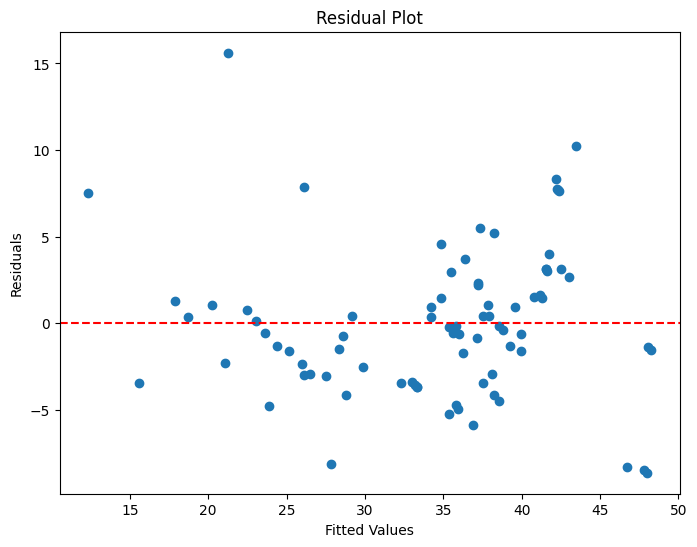

In [ ]:

import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cars.csv')


rsq_hp = smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_wt = smf.ols('WT~HP+VOL+SP',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)
rsq_vol = smf.ols('VOL~WT+SP+HP',data=df).fit().rsquared
vif_vol = 1/(1-rsq_vol)
rsq_sp = smf.ols('SP~WT+VOL+HP',data=df).fit().rsquared
vif_sp = 1/(1-rsq_sp)
d1 = {'Variables' : ['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
df_vif = pd.DataFrame(d1)

model = smf.ols('MPG ~ HP + WT + VOL + SP', data=df).fit()

plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


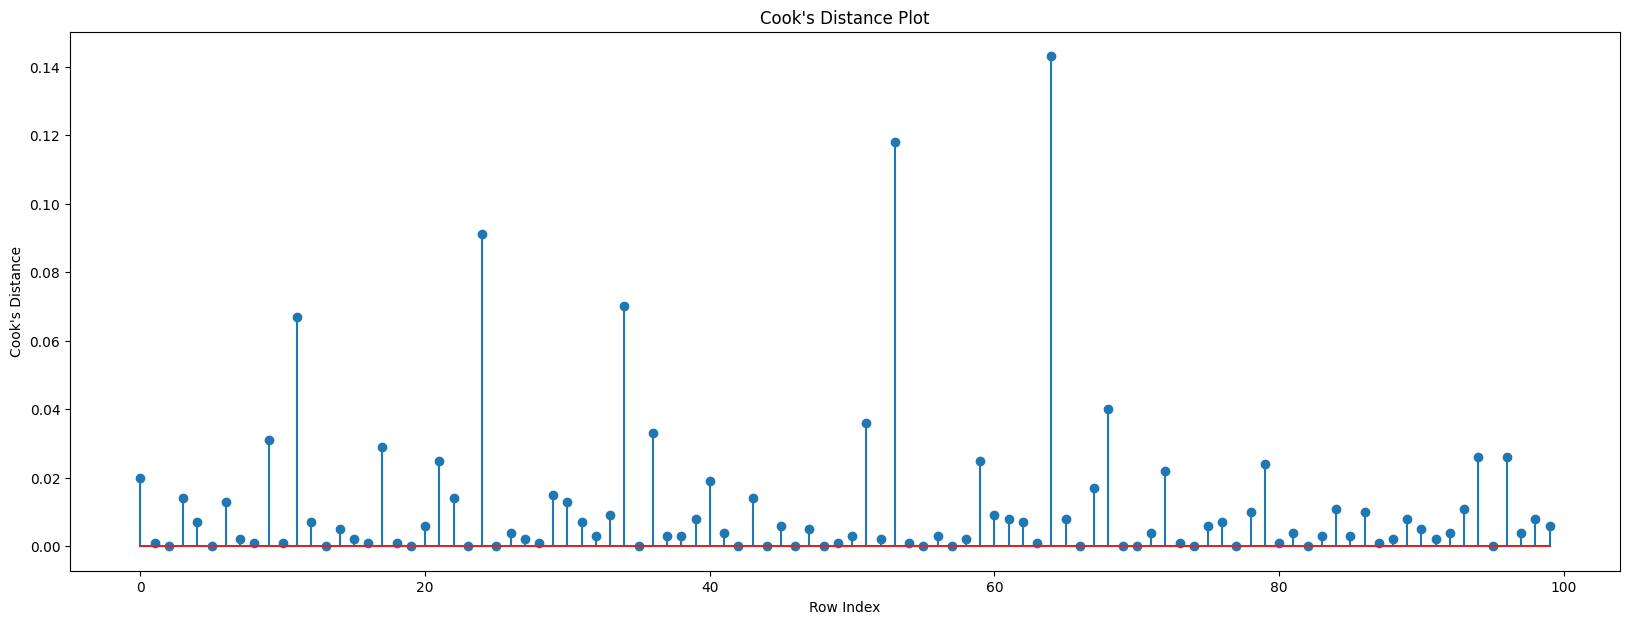

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = np.random.rand(100, 1)
Y = 2 * X + np.random.randn(100, 1)

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]


fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cooks_distance)), np.round(cooks_distance, 3))

plt.xlabel('Row Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.show()

<Figure size 2000x700 with 0 Axes>

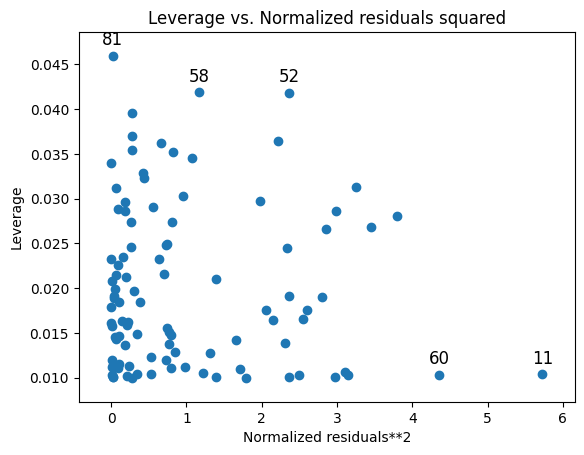

In [ ]:
import matplotlib.pyplot as plt
# leverage plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plt.figure(figsize=(20,7))
fig = plot_leverage_resid2(model)
plt.show()

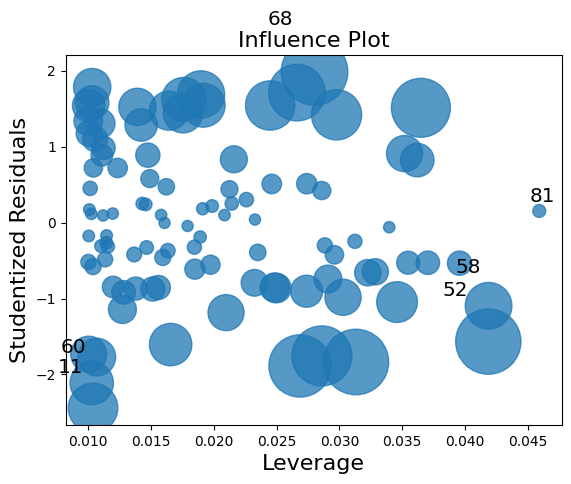

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3 * ((k + 1) / n)

df[df.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving Cars.csv to Cars (1).csv


In [15]:
(np.argmax(c_V), np.max(c_V))

(64, 0.14259958228363298)

In [20]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving Cars.csv to Cars.csv


In [21]:
df[df.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [22]:
car1 = df.loc[df.index[[70,76]]].reset_index()

In [27]:
car1=df.drop(df.index[[70,76]],axis=0).reset_index()

In [28]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [29]:
car1.head()

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149


In [33]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()